In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
def calculate_pearson(df):
    correlations = {}
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    numerical_features = numerical_features.drop("cod_municipio")
    for i in numerical_features:
        corr = stats.pearsonr(df[i], df['ideb'])[0]
        correlations[i] = corr
    df_corr = pd.DataFrame(list(correlations.items()), columns=['feature', 'correlation_with_ideb'])        
    df_corr = df_corr.dropna()
    
    return df_corr

In [3]:
def calculate_categorical_correlation(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    return categorical_features

# Puxa dados do CSV de cada integrante do grupo

### Dados Alexandre 

In [4]:
path = '../../data/'

In [5]:
#Dados iniciais
alexandre_inicio_2015 = pd.read_csv(path + 'bases_ale/anos_iniciais/ideb_municipios_2015_ai.csv')
alexandre_inicio_2017 = pd.read_csv(path + 'bases_ale/anos_iniciais/ideb_municipios_2017_ai.csv')

# Dados finais
alexandre_final_2015 = pd.read_csv(path + 'bases_ale/anos_finais/ideb_municipios_2015_af.csv')
alexandre_final_2017 = pd.read_csv(path + 'bases_ale/anos_finais/ideb_municipios_2017_af.csv')

### Dados Lidia

In [6]:
#Dados iniciais
lidia_inicio_2007 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2007_ai.csv')
lidia_inicio_2009 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2009_ai.csv')
lidia_inicio_2011 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2011_ai.csv')
lidia_inicio_2013 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2013_ai.csv')
lidia_inicio_2015 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2015_ai.csv')
lidia_inicio_2017 = pd.read_csv(path + 'bases_lidia/anos_iniciais/ideb_escola_2017_ai.csv')

# Dados finais
lidia_final_2007 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2007_af.csv')
lidia_final_2009 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2009_af.csv')
lidia_final_2011 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2011_af.csv')
lidia_final_2013 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2013_af.csv')
lidia_final_2015 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2015_af.csv')
lidia_final_2017 = pd.read_csv(path + 'bases_lidia/anos_finais/ideb_escola_2017_af.csv')

/home/alexandre_silva/.virtualenvs/E-xray-0edG8woV/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/alexandre_silva/.virtualenvs/E-xray-0edG8woV/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/alexandre_silva/.virtualenvs/E-xray-0edG8woV/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,50,52,170) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/alexandre_silva/.virtualenvs/E-xray-0edG8woV/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarnin

### Dados William

In [7]:
#Dados iniciais
william_inicio_2005 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2005_inic.csv')
william_inicio_2007 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2007_inic.csv')
william_inicio_2009 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2009_inic.csv')
william_inicio_2011 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2011_inic.csv')
william_inicio_2013 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2013_inic.csv')
william_inicio_2015 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2015_inic.csv')
william_inicio_2017 = pd.read_csv(path + 'bases_william/anos_iniciais/dados2017_inic.csv')


# Dados finais
william_final_2005 = pd.read_csv(path + 'bases_william/anos_finais/dados2005_fim.csv')
william_final_2007 = pd.read_csv(path + 'bases_william/anos_finais/dados2007_fim.csv')
william_final_2009 = pd.read_csv(path + 'bases_william/anos_finais/dados2009_fim.csv')
william_final_2011 = pd.read_csv(path + 'bases_william/anos_finais/dados2011_fim.csv')
william_final_2013 = pd.read_csv(path + 'bases_william/anos_finais/dados2013_fim.csv')
william_final_2015 = pd.read_csv(path + 'bases_william/anos_finais/dados2015_fim.csv')
william_final_2017 = pd.read_csv(path + 'bases_william/anos_finais/dados2017_fim.csv')

# Retirar dados NaN

### Lidia 

In [8]:
print(lidia_inicio_2007.shape)
print(lidia_inicio_2007.count()-lidia_inicio_2007.shape[0])

print(lidia_inicio_2009.shape)
print(lidia_inicio_2009.count()-lidia_inicio_2009.shape[0])

print(lidia_inicio_2011.shape)
print(lidia_inicio_2011.count()-lidia_inicio_2011.shape[0])

print(lidia_inicio_2013.shape)
print(lidia_inicio_2013.count()-lidia_inicio_2013.shape[0])

print(lidia_inicio_2015.shape)
print(lidia_inicio_2015.count()-lidia_inicio_2015.shape[0])

print(lidia_inicio_2017.shape)
print(lidia_inicio_2017.count()-lidia_inicio_2017.shape[0])

print(lidia_final_2007.shape)
print(lidia_final_2007.count()-lidia_final_2007.shape[0])

print(lidia_final_2009.shape)
print(lidia_final_2009.count()-lidia_final_2009.shape[0])

print(lidia_final_2011.shape)
print(lidia_final_2011.count()-lidia_final_2011.shape[0])

print(lidia_final_2013.shape)
print(lidia_final_2013.count()-lidia_final_2013.shape[0])

print(lidia_final_2015.shape)
print(lidia_final_2015.count()-lidia_final_2015.shape[0])

print(lidia_final_2017.shape)
print(lidia_final_2017.count()-lidia_final_2017.shape[0])


(41759, 204)
Unnamed: 0                                      0
Unnamed: 0.1                                    0
ano_censo                                       0
cod_escola_inep                                 0
regiao                                          0
municipio                                       0
tp_dependencia                                  0
tp_rede_publica                               -80
rede_publica_desc                               0
in_somente_matriculas_ac_ou_aee               -80
tp_rede_x                                       0
tp_rede_nome                                    0
tp_rede_cod                                     0
nome_escola                                     0
num_matriculas                                -80
num_estudantes                                -80
in_comum_creche                                 0
in_comum_pre                                    0
in_comum_fund_ai                                0
in_comum_fund_af                     

In [9]:
print('antes', lidia_inicio_2007.shape)
lidia_inicio_2007 = lidia_inicio_2007.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_inicio_2007.shape)
lidia_inicio_2007 = lidia_inicio_2007.dropna()
print('dados limpo',lidia_inicio_2007.shape)

print('antes',lidia_inicio_2009.shape)
lidia_inicio_2009 = lidia_inicio_2009.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_inicio_2009.shape)
lidia_inicio_2009 = lidia_inicio_2009.dropna()
print('dados limpo',lidia_inicio_2009.shape)

print('antes',lidia_inicio_2011.shape)
lidia_inicio_2011 = lidia_inicio_2011.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_inicio_2011.shape)
lidia_inicio_2011 = lidia_inicio_2011.dropna()
print('dados limpo',lidia_inicio_2011.shape)

print('antes',lidia_inicio_2013.shape)
lidia_inicio_2013 = lidia_inicio_2013.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_inicio_2013.shape)
lidia_inicio_2013 = lidia_inicio_2013.dropna()
print('dados limpo',lidia_inicio_2013.shape)

print('antes',lidia_inicio_2015.shape)
lidia_inicio_2015 = lidia_inicio_2015.dropna(axis='columns',thresh=15000)
print(lidia_inicio_2015.shape)
lidia_inicio_2015 = lidia_inicio_2015.dropna()
print('dados limpo',lidia_inicio_2015.shape)

print('antes',lidia_inicio_2017.shape)
lidia_inicio_2017 = lidia_inicio_2017.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_inicio_2017.shape)
lidia_inicio_2017 = lidia_inicio_2017.dropna()
print('dados limpo',lidia_inicio_2017.shape)

print('antes', lidia_final_2007.shape)
lidia_final_2007 = lidia_final_2007.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_final_2007.shape)
lidia_final_2007 = lidia_final_2007.dropna()
print('dados limpo',lidia_final_2007.shape)

print('antes',lidia_final_2009.shape)
lidia_final_2009 = lidia_final_2009.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_final_2009.shape)
lidia_final_2009 = lidia_final_2009.dropna()
print('dados limpo',lidia_final_2009.shape)

print('antes',lidia_final_2011.shape)
lidia_final_2011 = lidia_final_2011.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_final_2011.shape)
lidia_final_2011 = lidia_final_2011.dropna()
print('dados limpo',lidia_final_2011.shape)

print('antes',lidia_final_2013.shape)
lidia_final_2013 = lidia_final_2013.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_final_2013.shape)
lidia_final_2013 = lidia_final_2013.dropna()
print('dados limpo',lidia_final_2013.shape)

print('antes',lidia_final_2015.shape)
lidia_final_2015 = lidia_final_2015.dropna(axis='columns',thresh=15000)
print(lidia_final_2015.shape)
lidia_final_2015 = lidia_final_2015.dropna()
print('dados limpo',lidia_final_2015.shape)

print('antes',lidia_final_2017.shape)
lidia_final_2017 = lidia_final_2017.dropna(axis='columns',thresh=15000)
print('sem algumas colunas',lidia_final_2017.shape)
lidia_final_2017 = lidia_final_2017.dropna()
print('dados limpo',lidia_final_2017.shape)

antes (41759, 204)
sem algumas colunas (41759, 189)
dados limpo (9664, 189)
antes (42369, 184)
sem algumas colunas (42369, 169)
dados limpo (28640, 169)
antes (42784, 184)
sem algumas colunas (42784, 170)
dados limpo (27429, 170)
antes (43163, 184)
sem algumas colunas (43163, 174)
dados limpo (11947, 174)
antes (43378, 184)
(43378, 173)
dados limpo (14653, 173)
antes (43586, 184)
sem algumas colunas (43586, 174)
dados limpo (5777, 174)
antes (42784, 183)
sem algumas colunas (42784, 169)
dados limpo (40063, 169)
antes (42369, 183)
sem algumas colunas (42369, 168)
dados limpo (41852, 168)
antes (42784, 183)
sem algumas colunas (42784, 169)
dados limpo (40063, 169)
antes (43163, 183)
sem algumas colunas (43163, 173)
dados limpo (15652, 173)
antes (43378, 183)
(43378, 172)
dados limpo (19065, 172)
antes (43586, 183)
sem algumas colunas (43586, 173)
dados limpo (6948, 173)


### Alexandre 

In [10]:
print(alexandre_inicio_2015.shape)
print(alexandre_inicio_2015.count()-alexandre_inicio_2015.shape[0])

print(alexandre_inicio_2017.shape)
print(alexandre_inicio_2017.count()-alexandre_inicio_2017.shape[0])

print(alexandre_final_2015.shape)
print(alexandre_final_2015.count()-alexandre_final_2015.shape[0])

print(alexandre_final_2017.shape)
print(alexandre_final_2017.count()-alexandre_final_2017.shape[0])

(12048, 47)
Unnamed: 0                                  0
ano_censo                                   0
regiao                                      0
unidade_federativa                          0
mesoregiao                                  0
microregiao                                 0
municipio                                   0
cod_municipio                               0
num_escolas                                 0
num_escolas_em_atividade                    0
num_estudantes_ensino_infantil              0
num_estudantes_ensino_fund_anos_iniciais    0
num_estudantes_ensino_fund_anos_finais      0
num_estudantes_fund_1_ano                   0
num_estudantes_fund_2_ano                   0
num_estudantes_fund_3_ano                   0
num_estudantes_fund_4_ano                   0
num_estudantes_fund_5_ano                   0
num_estudantes_fund_6_ano                   0
num_estudantes_fund_7_ano                   0
num_estudantes_fund_8_ano                   0
num_estudantes_fund_9_

### William

In [11]:
print(william_inicio_2007.shape)
print(william_inicio_2007.count()-william_inicio_2007.shape[0])

print(william_inicio_2009.shape)
print(william_inicio_2009.count()-william_inicio_2009.shape[0])

print(william_inicio_2011.shape)
print(william_inicio_2011.count()-william_inicio_2011.shape[0])

print(william_inicio_2013.shape)
print(william_inicio_2013.count()-william_inicio_2013.shape[0])

print(william_inicio_2015.shape)
print(william_inicio_2015.count()-william_inicio_2015.shape[0])

print(william_inicio_2017.shape)
print(william_inicio_2017.count()-william_inicio_2017.shape[0])

print(william_final_2007.shape)
print(william_final_2007.count()-william_final_2007.shape[0])

print(william_final_2009.shape)
print(william_final_2009.count()-william_final_2009.shape[0])

print(william_final_2011.shape)
print(william_final_2011.count()-william_final_2011.shape[0])

print(william_final_2013.shape)
print(william_final_2013.count()-william_final_2013.shape[0])

print(william_final_2015.shape)
print(william_final_2015.count()-william_final_2015.shape[0])

print(william_final_2017.shape)
print(william_final_2017.count()-william_final_2017.shape[0])

(128, 15)
Unnamed: 0                           0
UF_REG                               0
Rede                                 0
TaxaAprovacao_1ao5ano                0
TaxaAprovacao_1ano                   0
TaxaAprovacao_2ano                   0
TaxaAprovacao_3ano                   0
TaxaAprovacao_4ano                   0
TaxaAprovacao_5ano                   0
IndicadorRendimento_inicial          0
NotaProvaBrasil_MT_inicial           0
NotaProvaBrasil_LP_inicial           0
NotaProvaBrasil_NotaMedia_inicial    0
Ideb                                 0
ProjecaoIdeb_inicial                 0
dtype: int64
(120, 16)
Unnamed: 0                           0
index                                0
UF_REG                               0
Rede                                 0
TaxaAprovacao_1ao5ano                0
TaxaAprovacao_1ano                   0
TaxaAprovacao_2ano                   0
TaxaAprovacao_3ano                   0
TaxaAprovacao_4ano                   0
TaxaAprovacao_5ano             

# Correlação

### Lidia

In [12]:
lidia_corr__inicio_2007 = calculate_pearson(lidia_inicio_2007)
lidia_corr__inicio_2007 = lidia_corr__inicio_2007.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__inicio_2009 = calculate_pearson(lidia_inicio_2009)
lidia_corr__inicio_2009 = lidia_corr__inicio_2009.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__inicio_2011 = calculate_pearson(lidia_inicio_2011)
lidia_corr__inicio_2011 = lidia_corr__inicio_2011.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__inicio_2013 = calculate_pearson(lidia_inicio_2013)
lidia_corr__inicio_2013 = lidia_corr__inicio_2013.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__inicio_2015 = calculate_pearson(lidia_inicio_2015)
lidia_corr__inicio_2015 = lidia_corr__inicio_2015.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__inicio_2017 = calculate_pearson(lidia_inicio_2017)
lidia_corr__inicio_2017 = lidia_corr__inicio_2017.sort_values(by=['correlation_with_ideb'], ascending=False)

lidia_corr__final_2007 = calculate_pearson(lidia_final_2007)
lidia_corr__final_2007 = lidia_corr__final_2007.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__final_2009 = calculate_pearson(lidia_final_2009)
lidia_corr__final_2009 = lidia_corr__final_2009.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__final_2011 = calculate_pearson(lidia_final_2011)
lidia_corr__final_2011 = lidia_corr__final_2011.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__final_2013 = calculate_pearson(lidia_final_2013)
lidia_corr__final_2013 = lidia_corr__final_2013.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__final_2015 = calculate_pearson(lidia_final_2015)
lidia_corr__final_2015 = lidia_corr__final_2015.sort_values(by=['correlation_with_ideb'], ascending=False)
lidia_corr__final_2017 = calculate_pearson(lidia_final_2017)
lidia_corr__final_2017 = lidia_corr__final_2017.sort_values(by=['correlation_with_ideb'], ascending=False)


/home/alexandre_silva/.virtualenvs/E-xray-0edG8woV/lib/python3.5/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [13]:
print(lidia_corr__inicio_2007)
print(lidia_corr__inicio_2009)
print(lidia_corr__inicio_2011)
print(lidia_corr__inicio_2013)
print(lidia_corr__inicio_2015)
print(lidia_corr__inicio_2017)

                            feature  correlation_with_ideb
45                             ideb               1.000000
56                     Unnamed: 0.1               0.537197
149                      Unnamed: 0               0.537197
60          ideb_2013_anos_iniciais               0.528504
95          ideb_2013_ai_media_port               0.524285
4         ideb_2013_ai_proficiencia               0.519969
65           ideb_2013_ai_media_mat               0.505612
126         ideb_2015_ai_media_port               0.483675
59          ideb_2015_anos_iniciais               0.472666
102       ideb_2015_ai_proficiencia               0.471025
78           ideb_2015_ai_media_mat               0.443483
61        ideb_2013_af_proficiencia               0.420138
82          ideb_2013_af_media_port               0.414646
160       ideb_2015_af_proficiencia               0.411284
118          ideb_2013_af_media_mat               0.407111
21           ideb_2015_af_media_mat               0.4021

print(lidia_corr__final_2007)
print(lidia_corr__final_2009)
print(lidia_corr__final_2011)
print(lidia_corr__final_2013)
print(lidia_corr__final_2015)
print(lidia_corr__final_2017)

### Variaveis categoricas

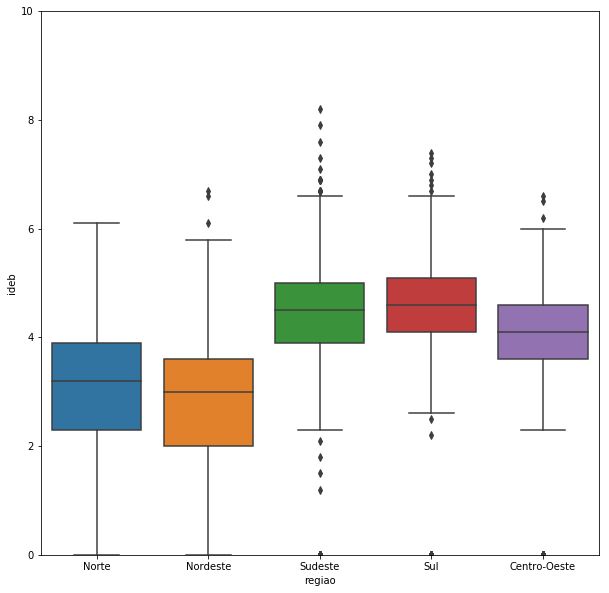

In [14]:
var = calculate_categorical_correlation(lidia_inicio_2007)[0]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

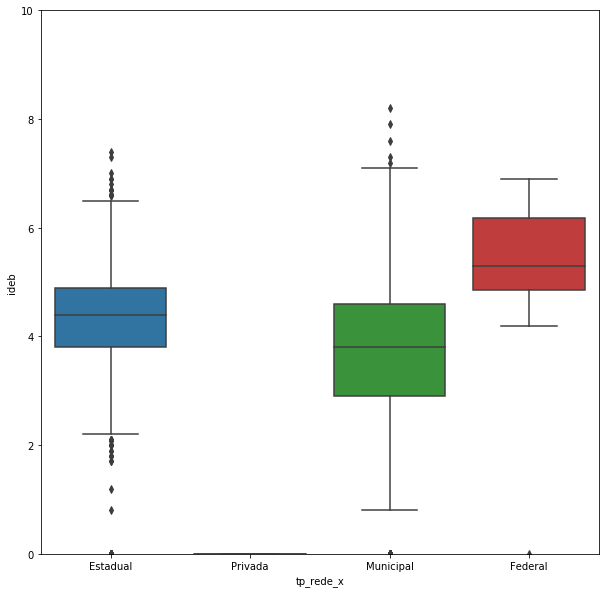

In [15]:
var = calculate_categorical_correlation(lidia_inicio_2007)[3]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

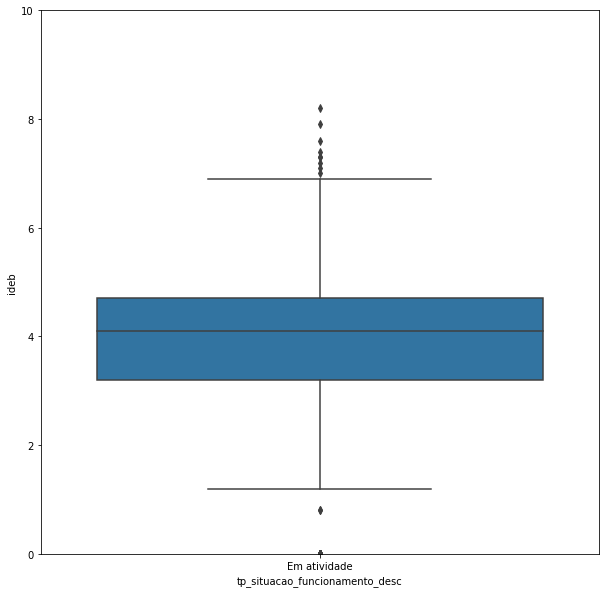

In [16]:
var = calculate_categorical_correlation(lidia_inicio_2007)[7]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

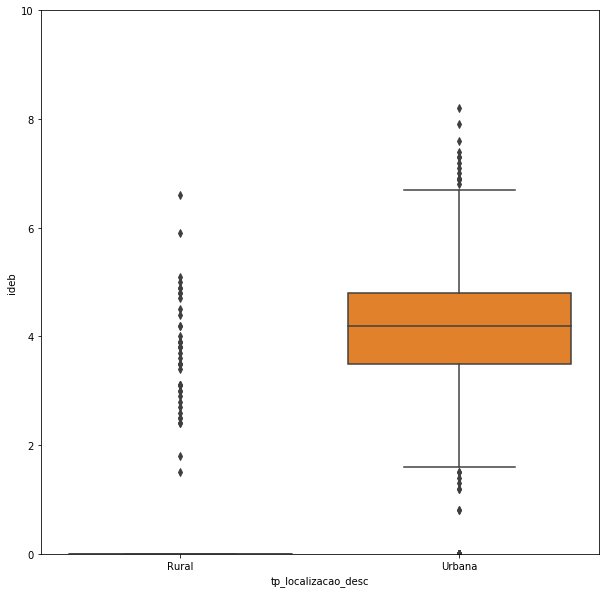

In [17]:
var = calculate_categorical_correlation(lidia_inicio_2007)[8]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

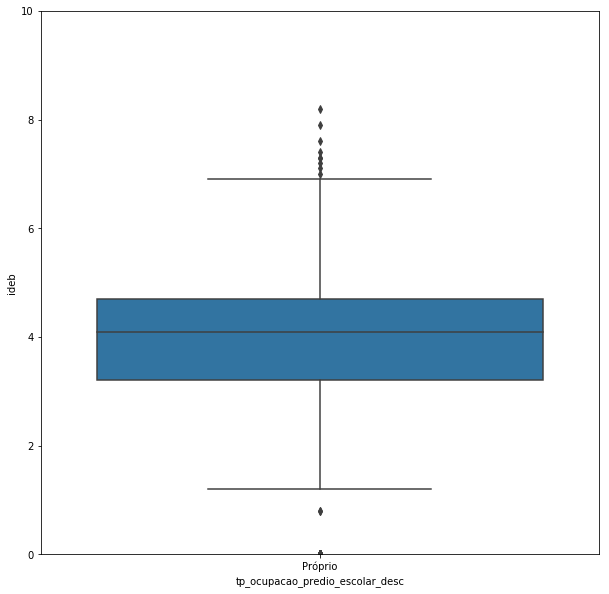

In [18]:
var = calculate_categorical_correlation(lidia_inicio_2007)[9]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

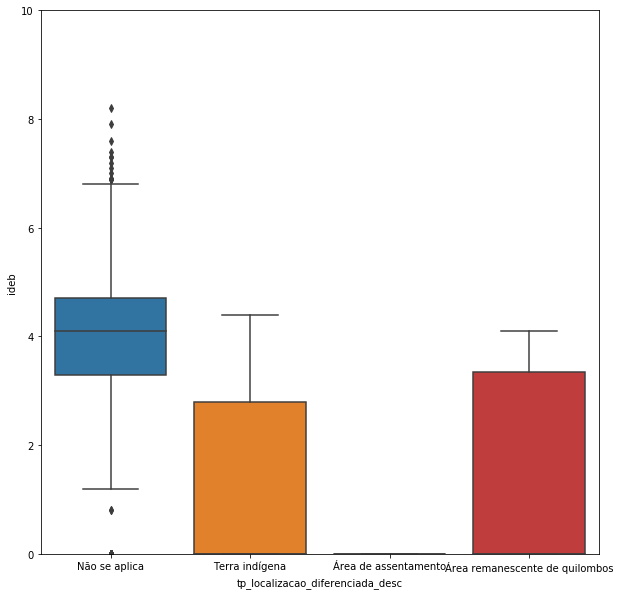

In [ ]:
var = calculate_categorical_correlation(lidia_inicio_2007)[10]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

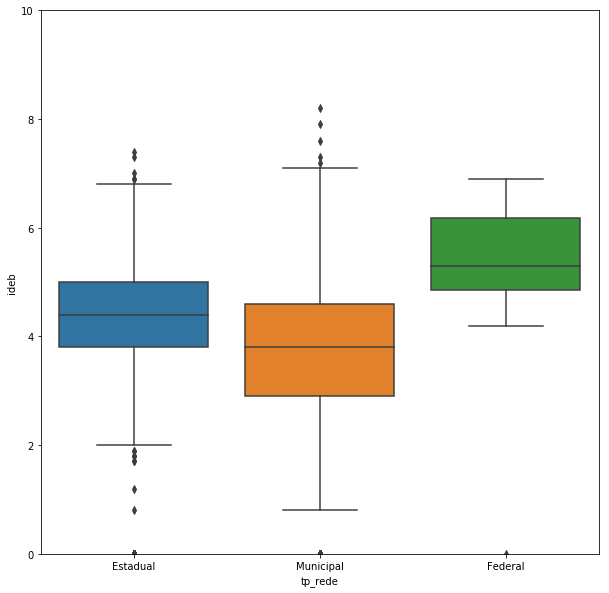

In [ ]:
var = calculate_categorical_correlation(lidia_inicio_2007)[11]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

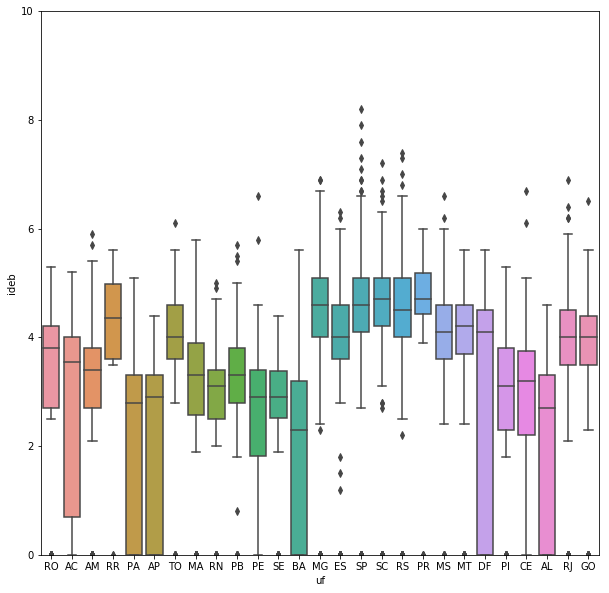

In [ ]:
var = calculate_categorical_correlation(lidia_inicio_2007)[12]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

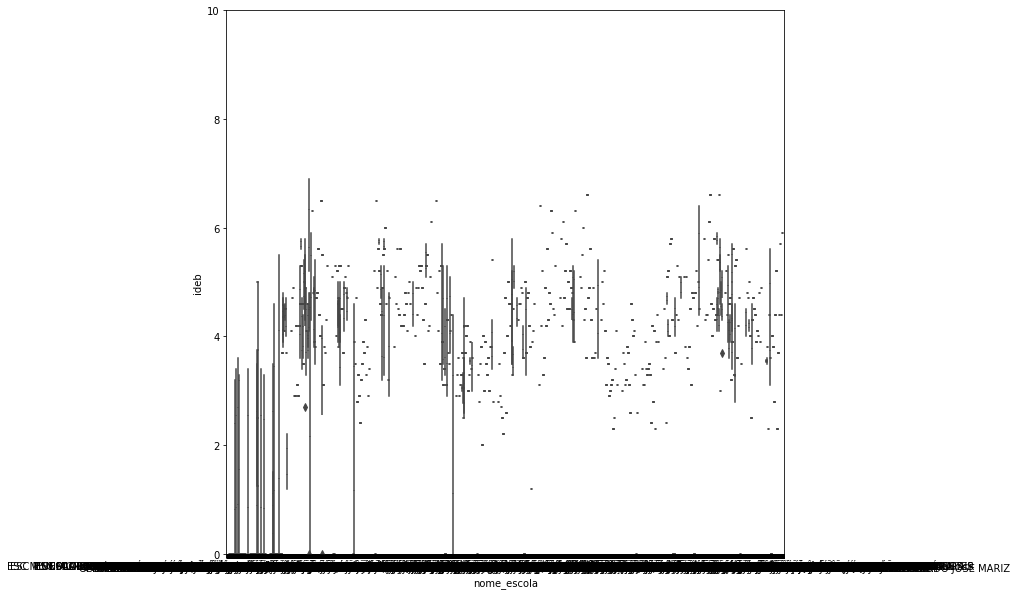

In [ ]:
var = calculate_categorical_correlation(lidia_inicio_2007)[6]
data = pd.concat([lidia_inicio_2007['ideb'], lidia_inicio_2007[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))

fig = sns.boxplot( x=var,y="ideb", data=data)
fig.axis(ymin=0, ymax=10);

In [ ]:
print('Before getting dummys',lidia_inicio_2007.shape)
lidia_inicio_2007 = pd.get_dummies(lidia_inicio_2007)
print('after getting dummys',lidia_inicio_2007.shape)

Before getting dummys (9664, 189)
after getting dummys (9664, 16038)


In [ ]:
y = lidia_inicio_2007['ideb']
x = lidia_inicio_2007.drop(columns=['ideb'])

In [ ]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1)

In [ ]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 5))
    return(rmse)

# Ridge Regression

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

In [ ]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alphaRidge = ridge.alpha_
print("Best alpha :", alphaRidge)

In [ ]:
ridge = make_pipeline(StandardScaler(), Ridge(alpha = alphaRidge, random_state=1))
ridge.fit(X_train, y_train)

In [ ]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Training error :", rmse_cv_train(ridge).std())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
print("Ridge RMSE on Test error :", rmse_cv_test(ridge).std())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()